In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
import plotly.express as px #Import plotly express for data visualization
import matplotlib.pyplot as plt     # Import the Matplotlib library for data visualization
import seaborn as sns   # Import the Seaborn library for statistical data visualization
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline #Import pipeline to automate functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Import scaling functions
from sklearn.model_selection import train_test_split, GridSearchCV  # Import the train_test_split function for splitting data
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_auc_score # Import functions for evaluating models
from sklearn.linear_model import LogisticRegression     # Import the LogisticRegression class for logistic regression
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier class for k-nearest neighbors classification
from sklearn.tree import DecisionTreeClassifier     # Import the DecisionTreeClassifier class for decision tree classification
from sklearn.ensemble import RandomForestClassifier     # Import the RandomForestClassifier class for random forest classification

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Notebook Link

https://www.kaggle.com/aliessamali/titanic-supervised-learning-classification

# Dataset

## Importing

In [89]:
# Importing our dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring the Data

In [90]:
print("Shape of the data:- ",df.shape)

Shape of the data:-  (891, 12)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Columns or Features Description¶
* PassengerId: A unique identifier assigned to each passenger.
* Survived: Indicates whether a passenger survived (1) or died (0).
* Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
* Name: The name of the passenger.
* Sex: Represents the gender of the passenger, typically categorized as male or female.
* Age: The age of the passenger, often represented as a numerical value.
* SibSp: Indicates the number of siblings or spouses traveling with the passenger.
* Parch: Represents the number of parents or children traveling with the passenger.
* Ticket: The ticket number associated with the passenger's ticket.
* Fare: The amount of money spent on the ticket.
* Cabin: Represents the cabin category or number assigned to the passenger, if available.
* Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [93]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [94]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How to handle them?
To handle missing values in the 'Age', 'Cabin', and 'Embarked' columns, we might consider various strategies, such as:

* For the 'Age' column, you could impute missing values by using statistical measures like mean, median, or regression models based on other available features.

* The 'Cabin' column has a large number of missing values. We might choose to drop this column entirely if it's not critical to our analysis.

* For the 'Embarked' column, we could impute missing values with the most frequent value or use advanced techniques like regression models if there is a relationship with other features.

Handling missing values is an important step in the data preprocessing stage to ensure the quality and integrity of the data before performing further analysis or building machine learning models.

# Visualising the Data

In [95]:
def count_plot(feature):
    # This function takes a feature as input and creates a count plot
    sns.countplot(x=feature, data=df)
    plt.show()
    print("\n")

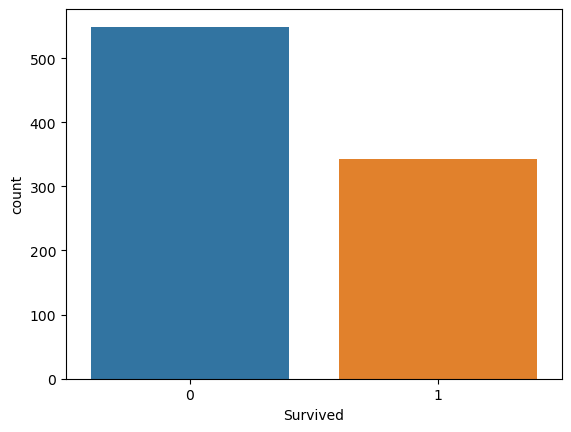

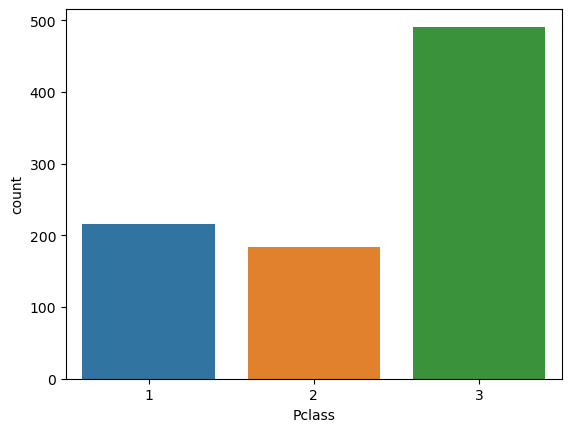

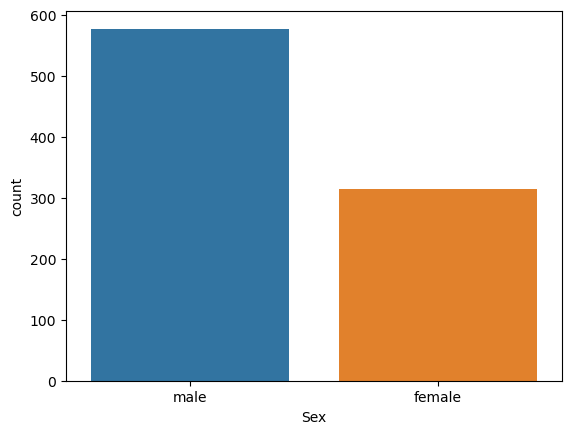

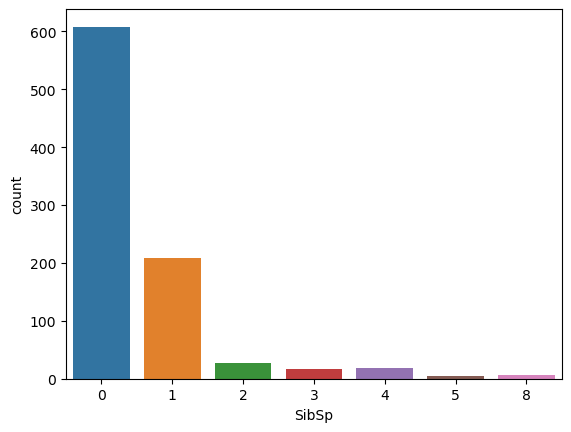

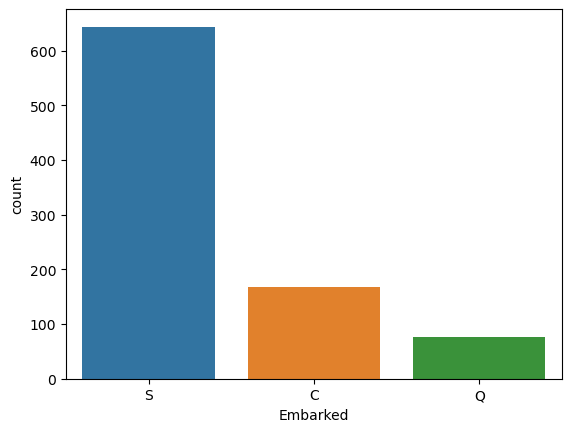

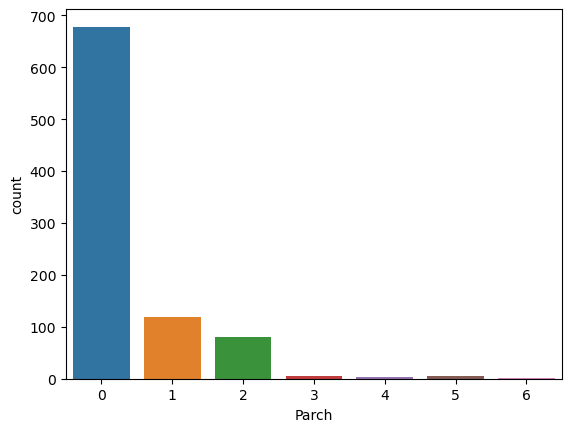

In [96]:
columns = ['Survived','Pclass','Sex','SibSp','Embarked', 'Parch']
for i in columns:
    count_plot(i)

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

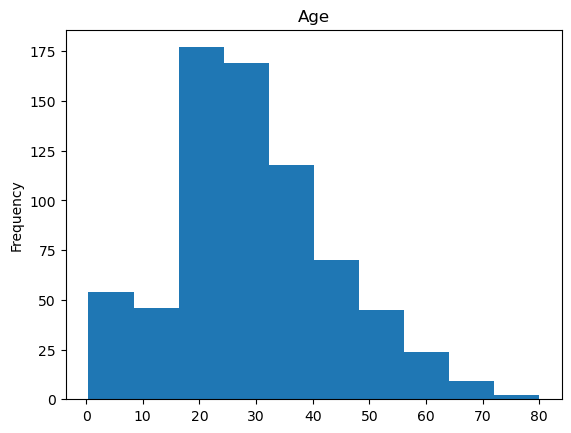

In [97]:
df["Age"].plot(kind='hist', title = "Age")

In [98]:
# Show pie chart of survival rate
survived_counts = df['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']
fig = px.pie(survived_counts, values='Count', names=['No', 'Yes'], title='Survived', labels={'Count': 'Count'}, color = ['No', 'Yes'])
fig.update_traces(textposition='inside',  textinfo='percent+label+value')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()

In [99]:
# Show histogram chart of survival counts by gender
fig1 = px.histogram(df, x='Sex', color='Survived', barmode='group', color_discrete_map={0: "red", 1: "blue"})
fig1.update_layout(title='Sex: Survived vs Dead')
fig1.show()

In [100]:
# Show histogram chart of survival counts by Pclass
fig2 = px.histogram(df, x='Pclass', color='Survived', barmode='group', title='Pclass: Survived vs Dead', labels={'Pclass': 'Pclass'}, color_discrete_map={0: 'red', 1: 'blue'})
fig2.update_layout(title='PClass: Survived vs Dead')
fig2.show()

# Data Preprocessing

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


drop unnecessary columns

In [102]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [103]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [104]:
# Fill missing values in age column by imputing the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [105]:
# Fill missing values in embarked column by imputing the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [107]:
# Transform categorical data into numerical data manually as there are only 2 to 3 values for each column
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 2} ).astype(int)
df['Embarked'] = df['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

# Feature Exploring

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



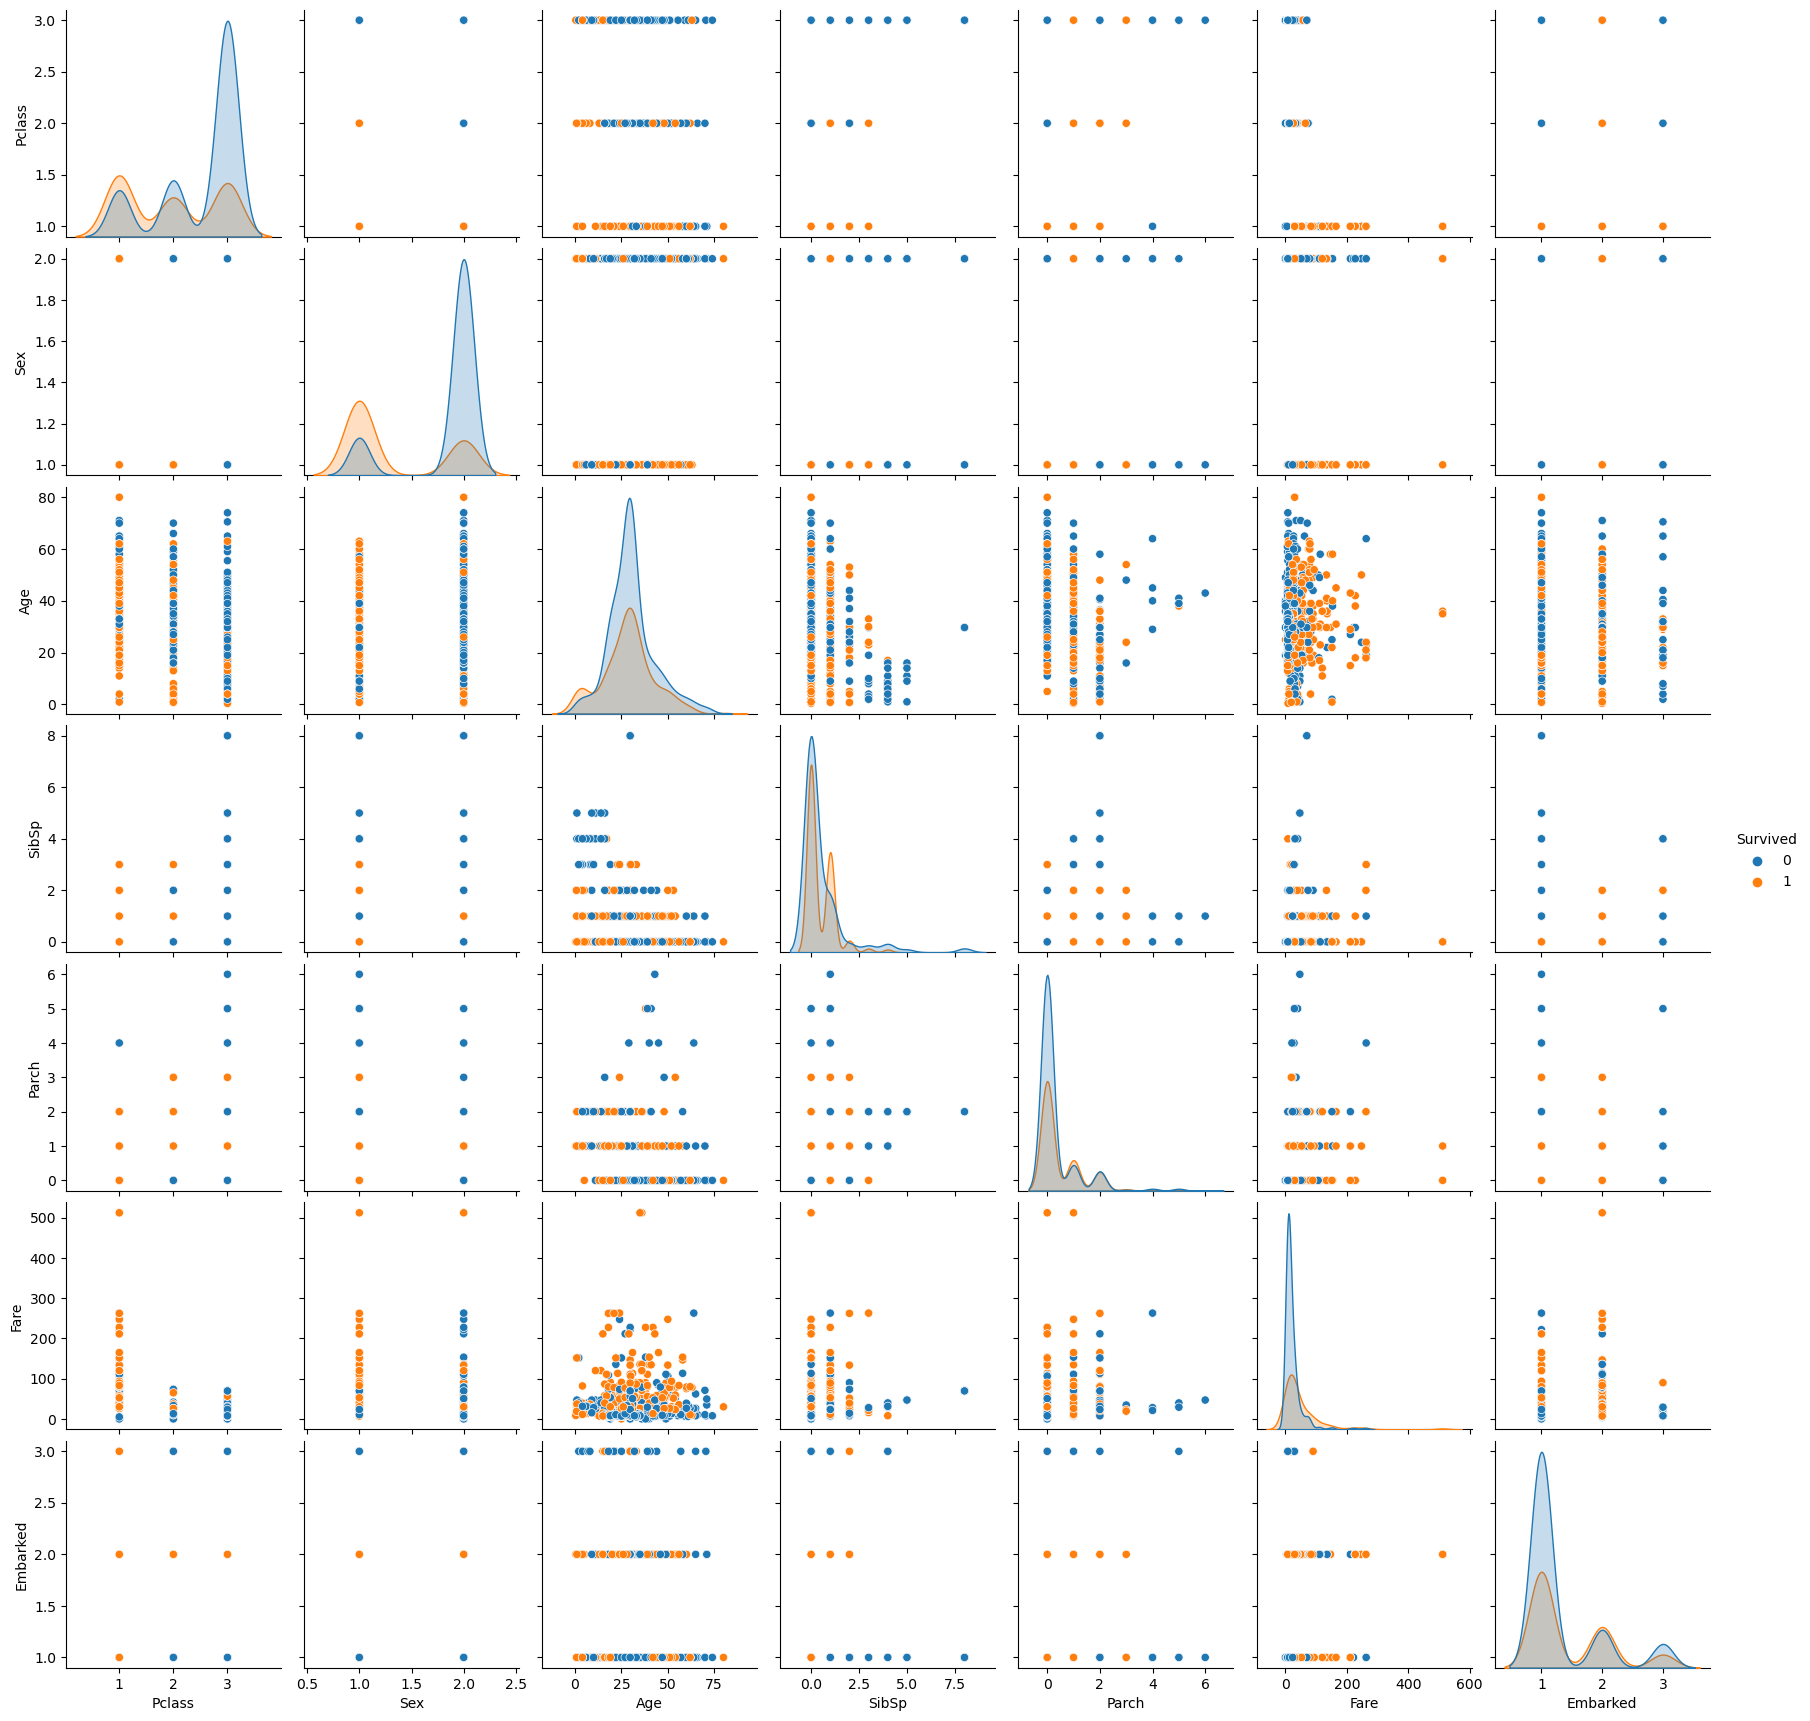

In [108]:
#Understanding the relationship between all the features
sns.pairplot(df, hue='Survived')

<Axes: >

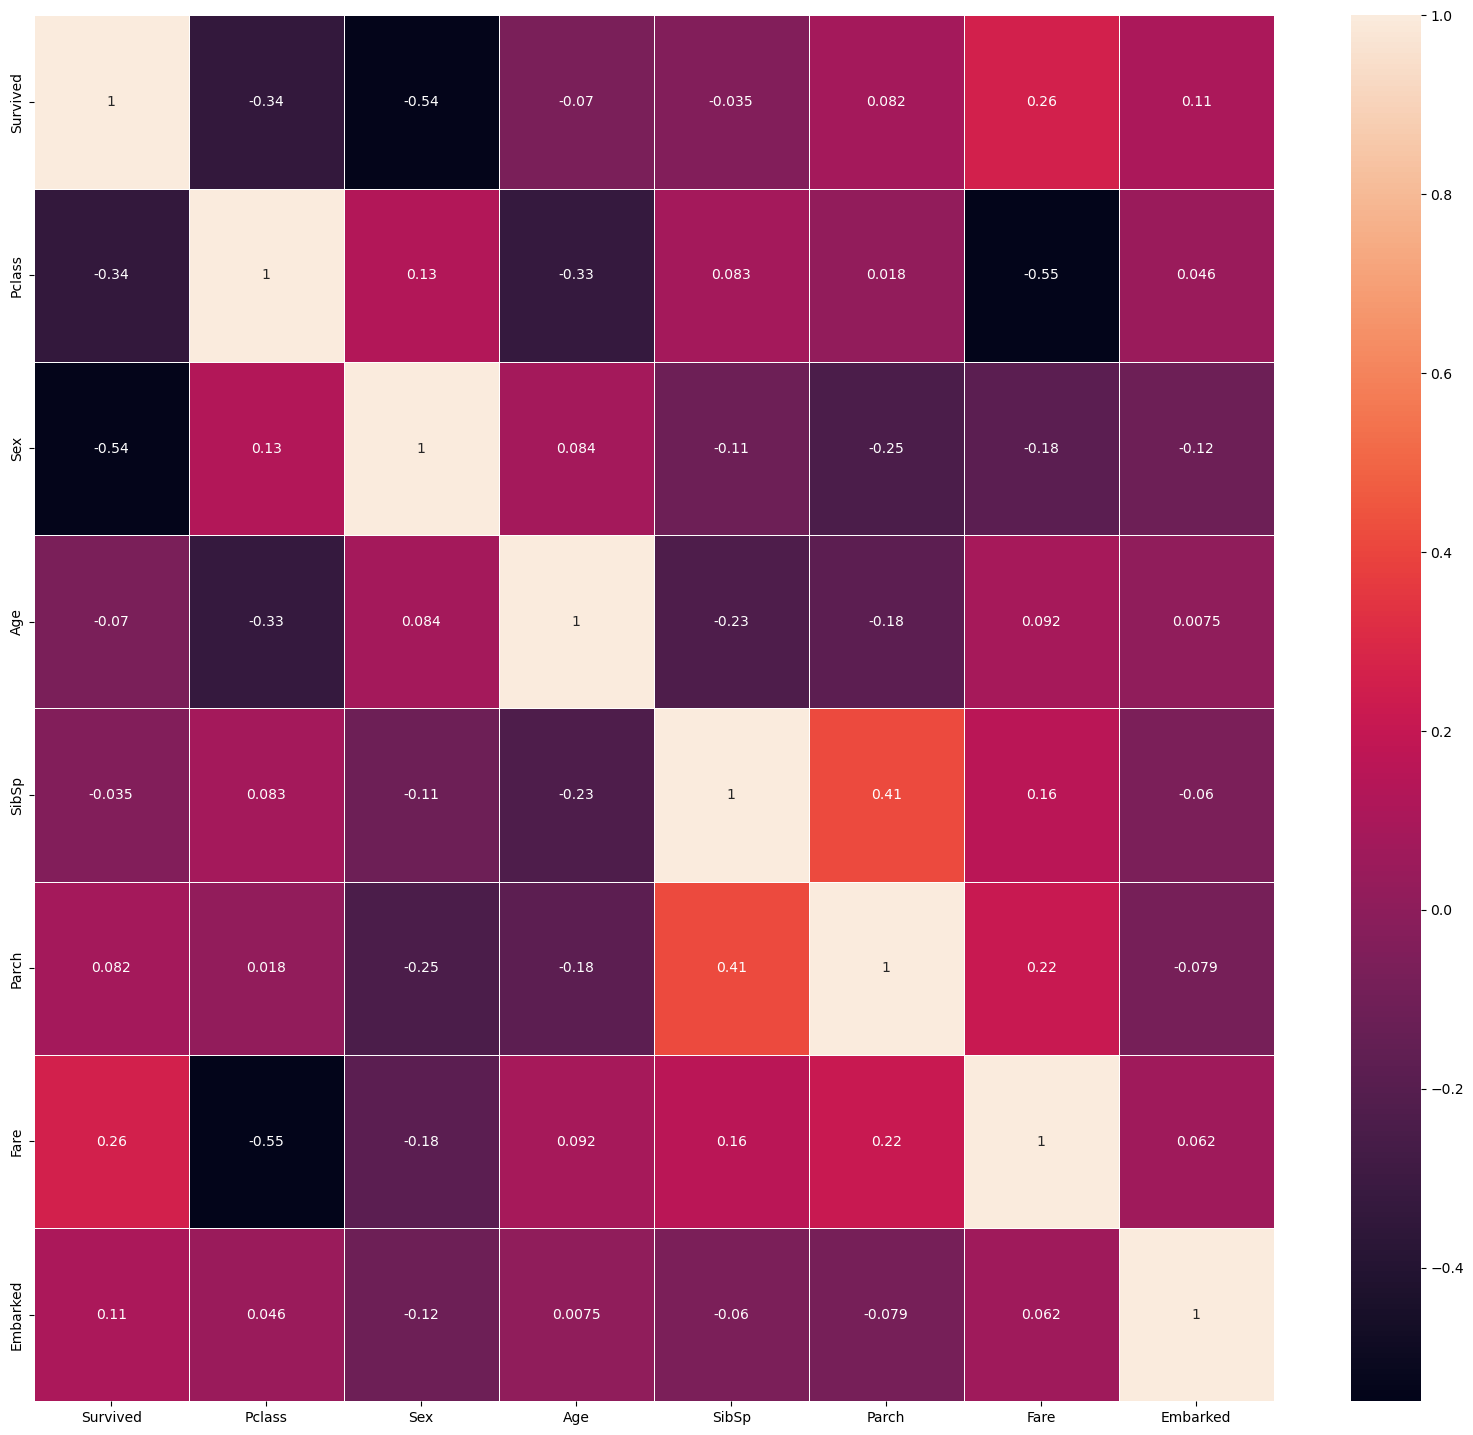

In [109]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,18)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5) 

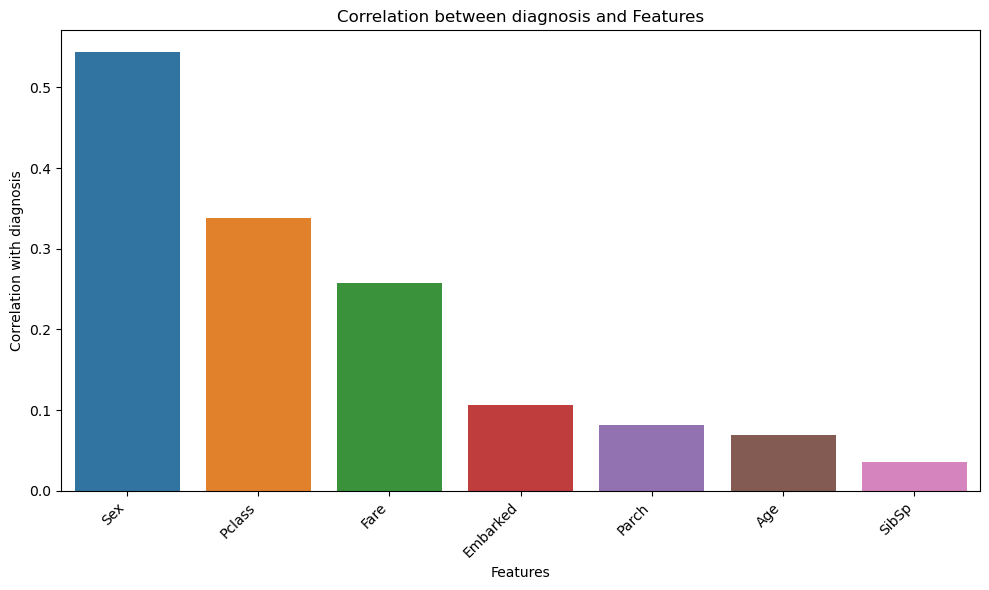

In [110]:
# Calculate the correlation list
target_corr = df.corr()['Survived'].abs().sort_values(ascending=False)
# Create a bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with diagnosis')
plt.title('Correlation between diagnosis and Features')
plt.tight_layout()
plt.show()

# Modeling

## Splitting Data and Scaling it

In [144]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (891, 7)
'y' shape: (891,)


## Defining Scoring Function

In [145]:
def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

## Logistic Regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 0.09492696934238304, 'penalty': 'l2', 'solver': 'newton-cg'}
Train Result:
Accuracy Score: 80.62%
_______________________________________________
ROC AUC Score: 86.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.823779    0.771784   0.80618    0.797782      0.804135
recall       0.875847    0.691450   0.80618    0.783648      0.806180
f1-score     0.849015    0.729412   0.80618    0.789214      0.803828
support    443.000000  269.000000   0.80618  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[388  55]
 [ 83 186]]



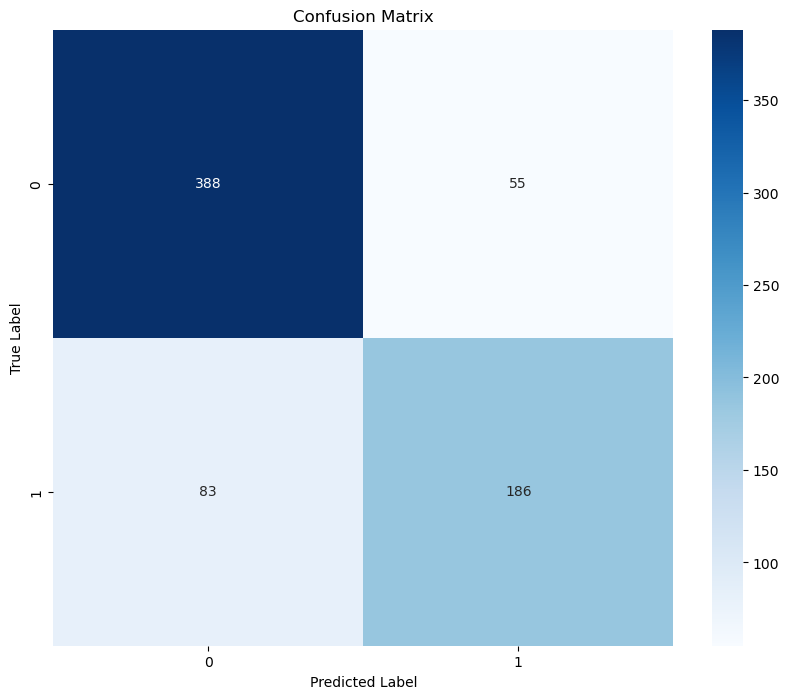

Test Result:
Accuracy Score: 79.33%
_______________________________________________
ROC AUC Score: 83.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.805310   0.772727  0.793296    0.789019      0.792022
recall       0.858491   0.698630  0.793296    0.778560      0.793296
f1-score     0.831050   0.733813  0.793296    0.782432      0.791395
support    106.000000  73.000000  0.793296  179.000000    179.000000
_______________________________________________
Confusion Matrix: 
 [[91 15]
 [22 51]]



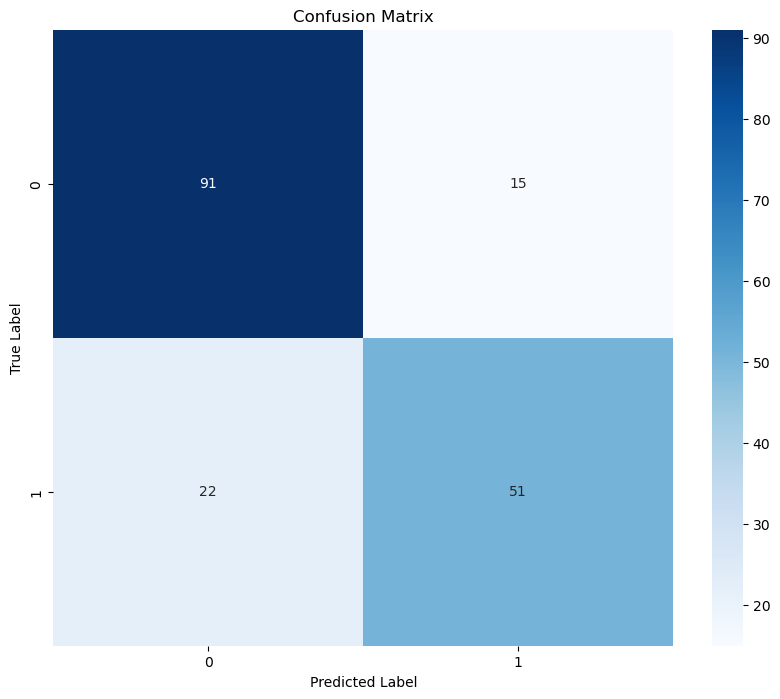

In [166]:
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
param_grid['C'] = loguniform.rvs(1e-5, 100, size=10)

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

## KNN

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
Best params: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
Train Result:
Accuracy Score: 84.13%
_______________________________________________
ROC AUC Score: 89.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.834008    0.857798  0.841292    0.845903      0.842996
recall       0.930023    0.695167  0.841292    0.812595      0.841292
f1-score     0.879402    0.767967  0.841292    0.823685      0.837301
support    443.000000  269.000000  0.841292  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[412  31]
 [ 82 187]]



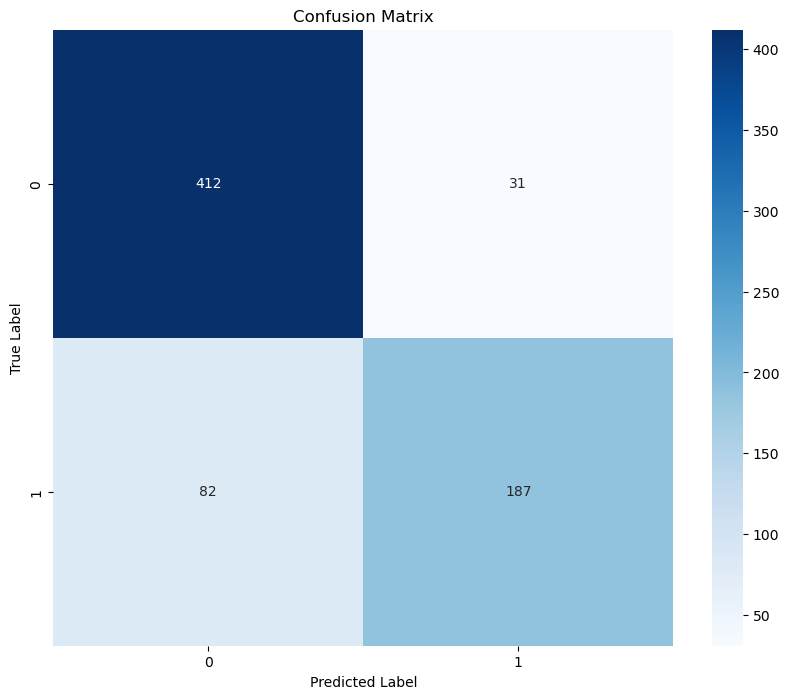

Test Result:
Accuracy Score: 79.33%
_______________________________________________
ROC AUC Score: 85.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.763359   0.875000  0.793296    0.819179      0.808888
recall       0.943396   0.575342  0.793296    0.759369      0.793296
f1-score     0.843882   0.694215  0.793296    0.769048      0.782844
support    106.000000  73.000000  0.793296  179.000000    179.000000
_______________________________________________
Confusion Matrix: 
 [[100   6]
 [ 31  42]]



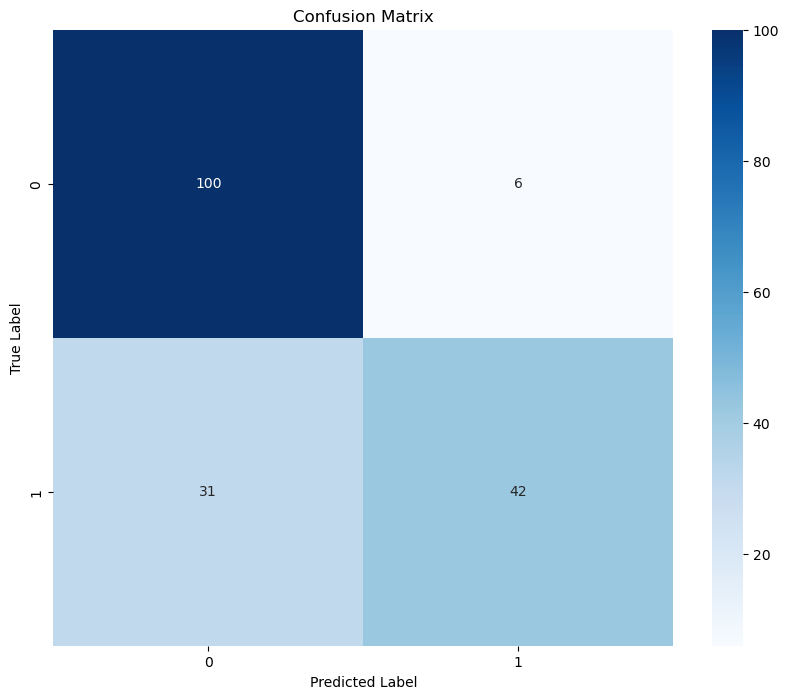

In [160]:
param_grid = {"n_neighbors": [i for i in range(1,20, 1)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

## Decision Tree

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}
Train Result:
Accuracy Score: 83.85%
_______________________________________________
ROC AUC Score: 88.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.853448    0.810484  0.838483    0.831966      0.837216
recall       0.893905    0.747212  0.838483    0.820559      0.838483
f1-score     0.873208    0.777563  0.838483    0.825386      0.837073
support    443.000000  269.000000  0.838483  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[396  47]
 [ 68 201]]



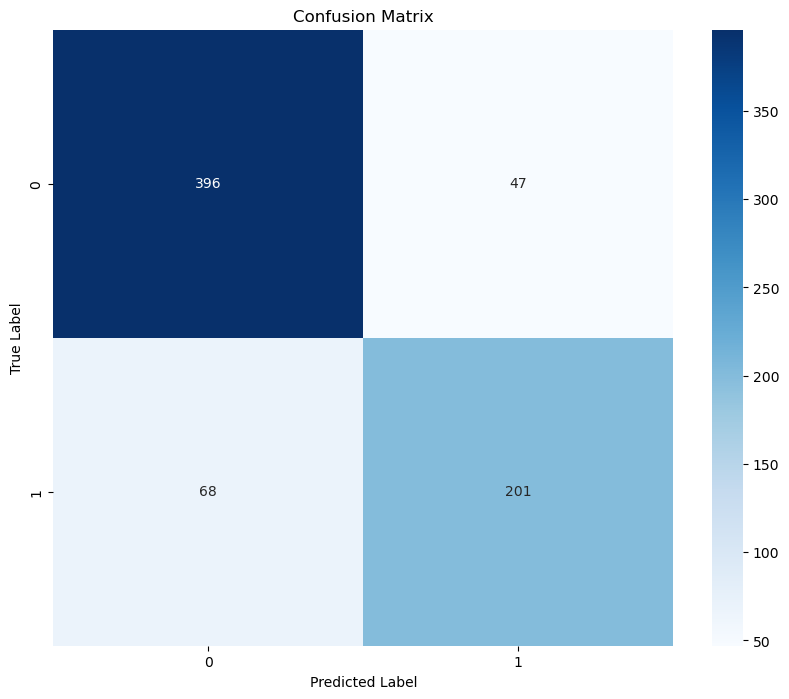

Test Result:
Accuracy Score: 80.45%
_______________________________________________
ROC AUC Score: 84.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.798319   0.816667  0.804469    0.807493      0.805802
recall       0.896226   0.671233  0.804469    0.783730      0.804469
f1-score     0.844444   0.736842  0.804469    0.790643      0.800562
support    106.000000  73.000000  0.804469  179.000000    179.000000
_______________________________________________
Confusion Matrix: 
 [[95 11]
 [24 49]]



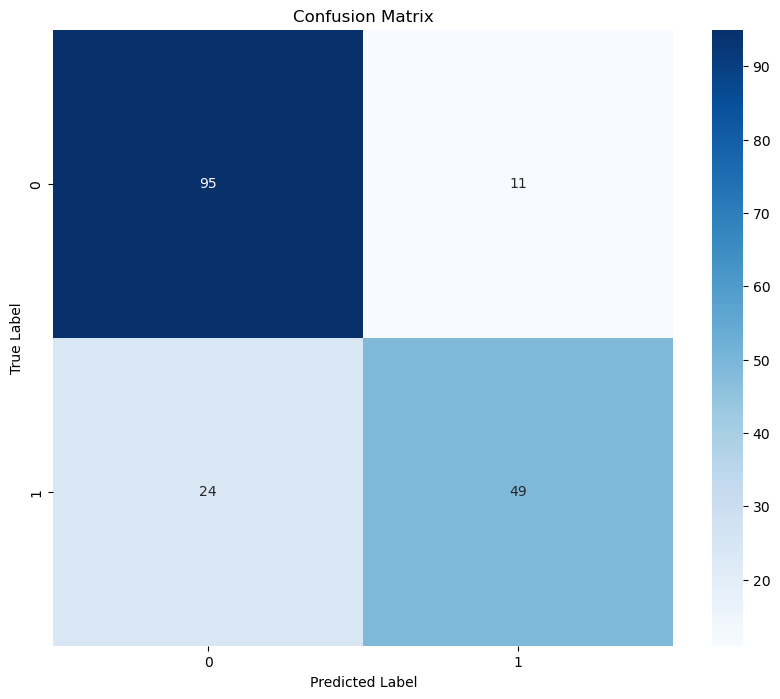

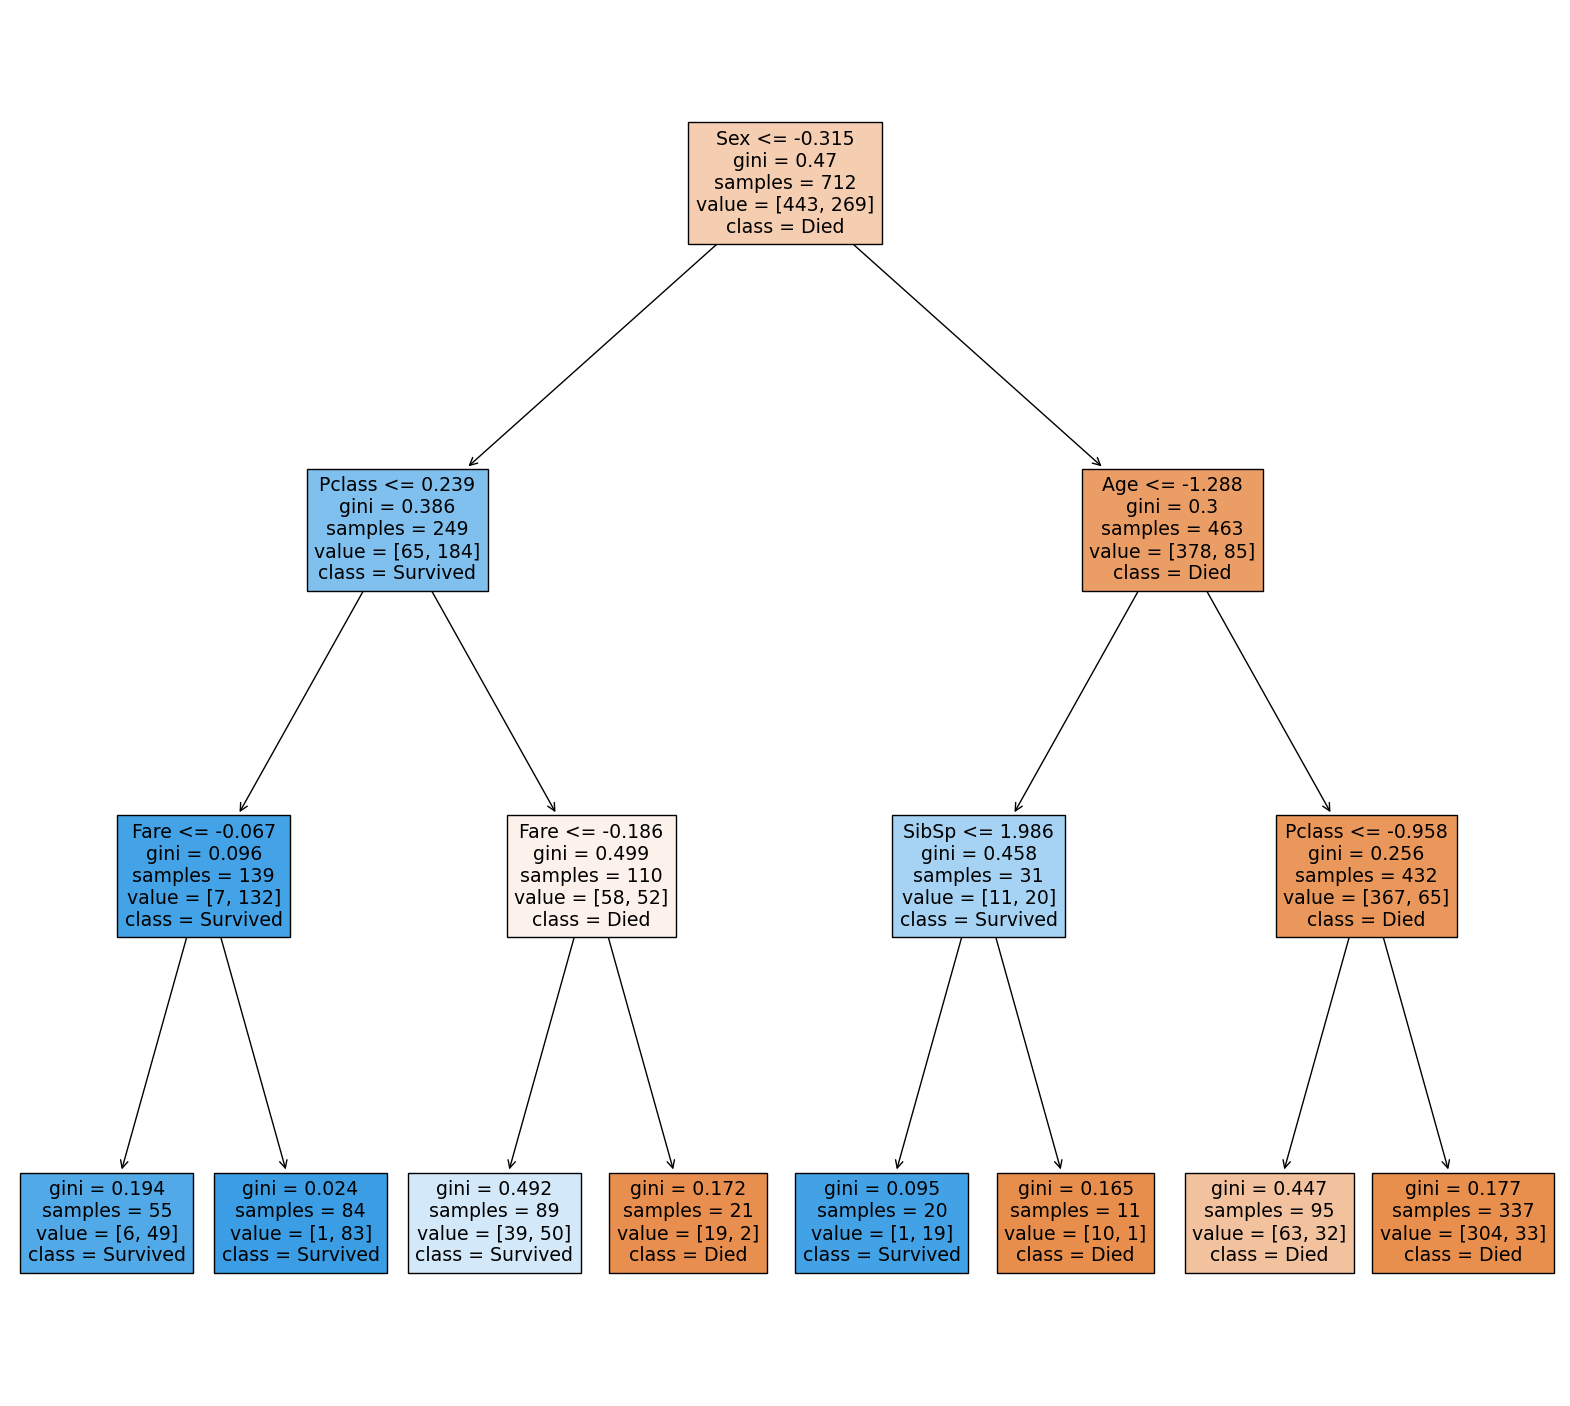

In [169]:
param_grid = {"max_depth": [1, 2, 3, None],
              "max_features": [i for i in range(1, 10, 1)],
              "min_samples_leaf": [i for i in range(1, 10, 1)],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
plt.figure(figsize=(20, 18))
tree.plot_tree(model, feature_names = df.columns.tolist()[1:], filled=True, class_names=["Died", "Survived"])
plt.show()

## Random Forest

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Train Result:
Accuracy Score: 88.76%
_______________________________________________
ROC AUC Score: 95.46%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.874227    0.916300   0.88764    0.895263      0.890122
recall       0.957111    0.773234   0.88764    0.865172      0.887640
f1-score     0.913793    0.838710   0.88764    0.876251      0.885426
support    443.000000  269.000000   0.88764  712.000000    712.000000
_______________________________________________
Confusion Matrix: 
 [[424  19]
 [ 61 208]]



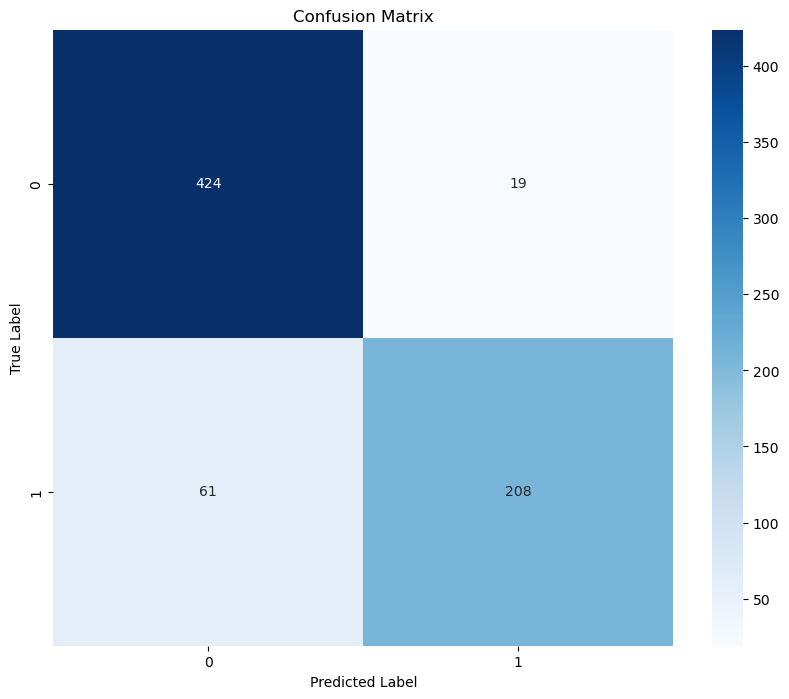

Test Result:
Accuracy Score: 78.77%
_______________________________________________
ROC AUC Score: 84.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.761538   0.857143  0.787709    0.809341      0.800528
recall       0.933962   0.575342  0.787709    0.754652      0.787709
f1-score     0.838983   0.688525  0.787709    0.763754      0.777623
support    106.000000  73.000000  0.787709  179.000000    179.000000
_______________________________________________
Confusion Matrix: 
 [[99  7]
 [31 42]]



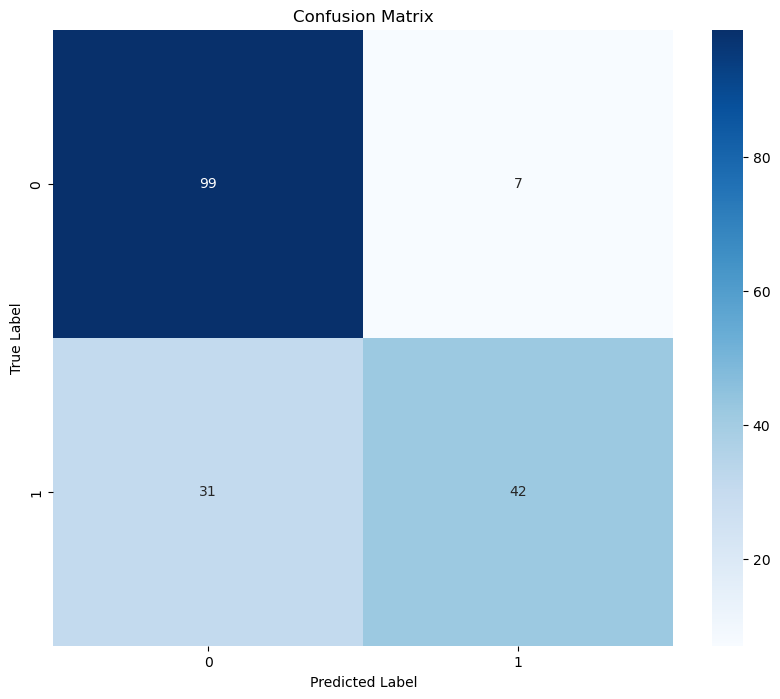

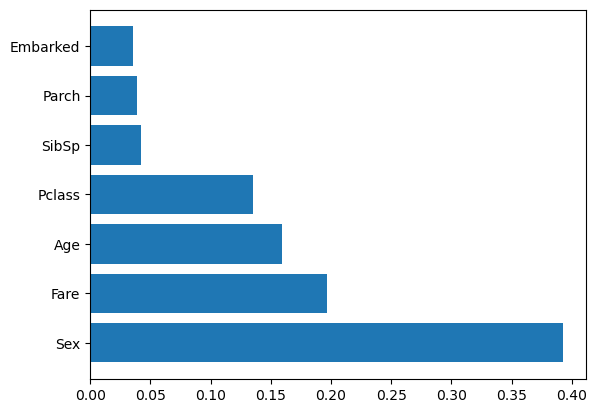

In [178]:
param_grid = {'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
rfi=pd.Series(model.feature_importances_, index=df.columns.tolist()[1:]).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

According to the scores from the previous results, we can conclude that the Decision Tree model is the best predictor for this problem.